# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Declaring empty lists to collect response data.
data_cities = []
data_lat = []
data_lng = []
data_temp = []
data_humidity = []
data_cloud = []
data_wind = []
data_country = []
data_date = []

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Soft counter for indexing the city list. I think it's possible to use enumerate to do this cleaner.
i = 1

# Looping through each city and pinging the API for information.
for city in cities:
    # Adding try/except clause in case the request comes back empty.
    try:
        # Getting the data from the weather service, converting it to json to be read.
        response = requests.get(query_url + city).json()
        print(f'Processing Record {i} | {city}')
        
        # Pulling relevant data into lists to form data frame later.
        data_cities.append(response['name'])
        data_lat.append(response['coord']['lat'])
        data_lng.append(response['coord']['lon'])
        data_temp.append(response['main']['temp_max'])
        data_humidity.append(response['main']['humidity'])
        data_cloud.append(response['clouds']['all'])
        data_wind.append(response['wind']['speed'])
        data_country.append(response['sys']['country'])
        data_date.append(response['dt'])
        
        # Progressing the "index"
        i += 1
    
    except:
        print('City not found. Skipping...')

Processing Record 1 | bethel
Processing Record 2 | thaton
Processing Record 3 | augustow
Processing Record 4 | busselton
Processing Record 5 | tasiilaq
Processing Record 6 | okhotsk
Processing Record 7 | albany
Processing Record 8 | rikitea
Processing Record 9 | qui nhon
Processing Record 10 | shingu
Processing Record 11 | poya
Processing Record 12 | bluff
Processing Record 13 | kloulklubed
Processing Record 14 | severo-kurilsk
Processing Record 15 | barentsburg
City not found. Skipping...
Processing Record 15 | thompson
Processing Record 16 | yulara
Processing Record 17 | cherskiy
Processing Record 18 | avarua
Processing Record 19 | ribeira grande
Processing Record 20 | punta arenas
Processing Record 21 | el alto
Processing Record 22 | grand river south east
City not found. Skipping...
Processing Record 22 | vaini
Processing Record 23 | lafia
Processing Record 24 | krasnyy oktyabr
Processing Record 25 | umm lajj
Processing Record 26 | tocopilla
Processing Record 27 | champerico
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Bringing the data together into a dictionary to make the data frame.
weather_dict = {
    "City": data_cities,
    "Lat": data_lat,
    'Lng': data_lng,
    'Max Temp': data_temp,
    'Humidity': data_humidity,
    'Cloudiness': data_cloud,
    'Wind Speed': data_wind,
    'Country': data_country,
    'Date': data_date
}
weather_df = pd.DataFrame(weather_dict)

# Exporting the data to a CSV file.
weather_df.to_csv(output_data_file, index = False, header = True)

# Previewing the top, making sure it looks okay.
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bethel,41.3712,-73.4140,28.60,73,21,0.89,US,1631988051
1,Thaton,16.9206,97.3714,25.06,91,86,0.48,MM,1631988051
2,Augustów,53.8432,22.9798,6.32,95,100,5.68,PL,1631988052
3,Busselton,-33.6500,115.3333,11.16,84,96,1.67,AU,1631988053
4,Tasiilaq,65.6145,-37.6368,4.09,69,25,1.81,GL,1631988053


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
# Get the indices of cities that have humidity over 100%.
print(weather_df[weather_df['Humidity']>100].index.values)

[]


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [10]:
# Getting a quick overview of the data.
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,585.000000,585.000000,585.000000,585.000000,585.000000,585.00000,5.850000e+02
mean,21.158922,17.415928,19.076239,68.711111,53.302564,3.47759,1.631988e+09
std,33.574059,91.725940,10.001588,21.625477,37.522127,2.36259,9.266751e+01
min,-54.800000,-179.166700,-9.130000,8.000000,0.000000,0.00000,1.631988e+09
25%,-7.470600,-67.383300,11.220000,59.000000,16.000000,1.79000,1.631988e+09
50%,26.124700,21.256100,21.170000,73.000000,57.000000,3.04000,1.631988e+09
75%,49.154100,99.132800,26.540000,85.000000,92.000000,4.62000,1.631988e+09
max,78.218600,179.316700,43.970000,100.000000,100.000000,15.45000,1.631988e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

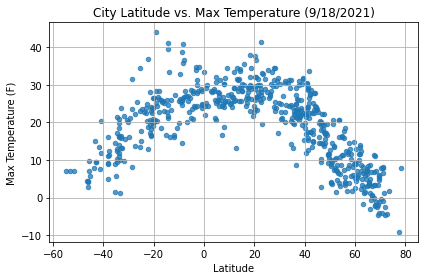

Analysis: 
The closer we are to the equator (0 degrees Latitude) the hotter it is.
We see this as the graph forms a parabolic structure, climbing and then coming back down.
This is because the earth is on a tilt and the equator is the closest point to the sun.


In [13]:
# These plots ask for current date of analysis so I'm declaring here to use throughout.
today = "(9/18/2021)"

weather_df.plot.scatter(x = 'Lat', y = 'Max Temp', grid = True, alpha = 0.75)
plt.xlabel("Latitude") 
plt.ylabel("Max Temperature (F)")
plt.title(f'City Latitude vs. Max Temperature {today}')
plt.tight_layout()
plt.show()

print('''Analysis: 
The closer we are to the equator (0 degrees Latitude) the hotter it is.
We see this as the graph forms a parabolic structure, climbing and then coming back down.
This is because the earth is on a tilt and the equator is the closest point to the sun.''')

## Latitude vs. Humidity Plot

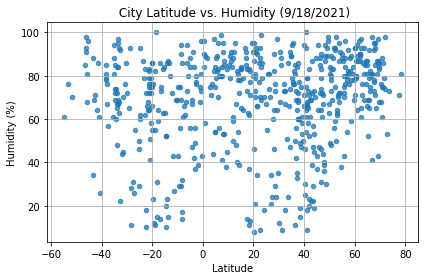

Analysis:
Nearly the full spread of diffrent humidities (from 0 to 100) occurred at every latitude
as we see points spread throughout the graph; however, it does seem that towards the extreme
latitudes (closer to the edges, -60 and 60 respectively) that the cities 
will experience higher average levels of humidity.


In [14]:
weather_df.plot.scatter(x = 'Lat', y = 'Humidity', grid = True, alpha = 0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)") 
plt.title(f' City Latitude vs. Humidity {today}')
plt.tight_layout()
plt.show()

print('''Analysis:
Nearly the full spread of diffrent humidities (from 0 to 100) occurred at every latitude
as we see points spread throughout the graph; however, it does seem that towards the extreme
latitudes (closer to the edges, -60 and 60 respectively) that the cities 
will experience higher average levels of humidity.''')

## Latitude vs. Cloudiness Plot

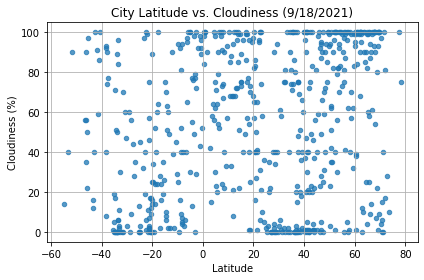

Analysis:
Latitude doesn't seem to have much of a relationship to a city's cloudiness,
This is evident as the graph has values spread throughout. 
Clusters of points at the top and bottom imply that it is cities either 
experience consistent cloudiness or none at all.
Others factors may be at play such as a city's elevation or proximity to water.


In [15]:
weather_df.plot.scatter(x = 'Lat', y = 'Cloudiness', grid = True, alpha = 0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)") 
plt.title(f'City Latitude vs. Cloudiness {today}')
plt.tight_layout()
plt.show()

print('''Analysis:
Latitude doesn\'t seem to have much of a relationship to a city\'s cloudiness,
This is evident as the graph has values spread throughout. 
Clusters of points at the top and bottom imply that it is cities either 
experience consistent cloudiness or none at all.
Others factors may be at play such as a city\'s elevation or proximity to water.''')

## Latitude vs. Wind Speed Plot

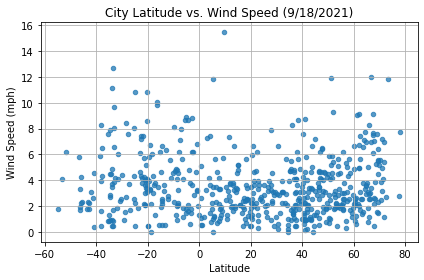

Analysis:
It would appear outside of a few potential outlier cases, 
most cities experienced average winds below 10 mph, with a heavier density below 4 mph.
As far the relationship with latitude, wind appears to be independent.
Perhaps related to elevation instead.


In [16]:
weather_df.plot.scatter(x = 'Lat', y = 'Wind Speed', grid = True, alpha = 0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f'City Latitude vs. Wind Speed {today}')
plt.tight_layout()
plt.show()

print('''Analysis:
It would appear outside of a few potential outlier cases, 
most cities experienced average winds below 10 mph, with a heavier density below 4 mph.
As far the relationship with latitude, wind appears to be independent.
Perhaps related to elevation instead.''')

## Linear Regression

In [17]:
# The rest of the problems want to be separated by the Northern or Hemisphere of the globe.
# To do this we cut off at 0 degrees latitude.
# Creating dataframes to easily pull the data into the graphs.

northern_df = weather_df[weather_df['Lat']>=0]
southern_df = weather_df[weather_df['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

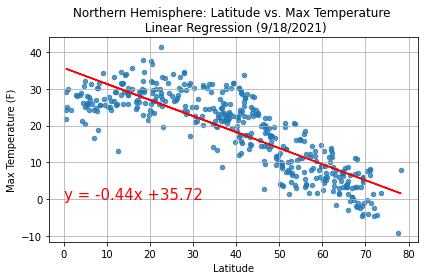

Correlation coeffecient [R-Value] is -0.83


In [25]:
# Finding the linear regression information.
(slope, intercept, rvalue, _, _) = linregress(northern_df['Lat'],northern_df['Max Temp'])

# Creating the best fit line to be overlaid on the graph later.
fit = slope*northern_df['Lat']+intercept

# Creating the intial scatterplot.
northern_df.plot.scatter(x = 'Lat', y = 'Max Temp', grid = True, alpha = 0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)") 
plt.title(f'Northern Hemisphere: Latitude vs. Max Temperature \n Linear Regression {today}')

# Adding the best line over the graph.
plt.plot(northern_df['Lat'], fit ,"-", color = "red")

# Overlaying the equation for the line in a clean to read manner.
plt.annotate(f'y = {round(slope, 2)}x +{round(intercept, 2)}', 
[0, 0], color = 'red', fontsize = 15)

# Cleaning up the image and printing the r-value.
plt.tight_layout()
plt.show()

print(f'Correlation coeffecient [R-Value] is {round(rvalue,2)}')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

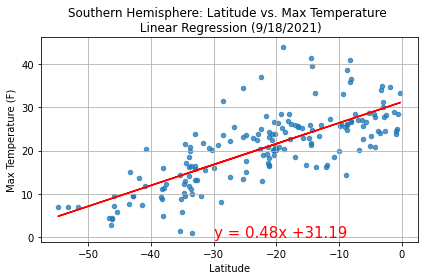

Correlation coeffecient [R-Value] is 0.75
Analysis:
Breaking into the different hemispheres, 
we can see a fairly strong correlation exists between a City's latitude and max temperature.
Both graphs had r-values with magnitudes greather than 0.7, telling us that
latitude is a strong predictor of a city's max temperature experienced, specifically
an inverse relationship in the North, direct in the South.


In [27]:
# Refer to: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
# For notes on the code. This is just a modified copy.

(slope, intercept, rvalue, _, _) = linregress(southern_df['Lat'],southern_df['Max Temp'])
fit = slope*southern_df['Lat']+intercept


southern_df.plot.scatter(x = 'Lat', y = 'Max Temp', grid = True, alpha = 0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)") 
plt.title(f'Southern Hemisphere: Latitude vs. Max Temperature \n Linear Regression {today}')

plt.plot(southern_df['Lat'], fit ,"-", color = "red")
plt.annotate(f'y = {round(slope, 2)}x +{round(intercept, 2)}', 
[-30, 0], color = 'red', fontsize = 15)

plt.tight_layout()
plt.show()

print(f'Correlation coeffecient [R-Value] is {round(rvalue,2)}')

print('''Analysis:
Breaking into the different hemispheres, 
we can see a fairly strong correlation exists between a City\'s latitude and max temperature.
Both graphs had r-values with magnitudes greather than 0.7, telling us that
latitude is a strong predictor of a city\'s max temperature experienced, specifically
an inverse relationship in the North, direct in the South.''')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

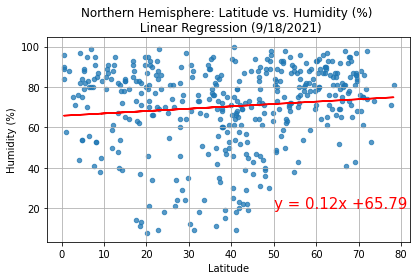

Correlation coeffecient [R-Value] is 0.11


In [29]:
# Refer to: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
# For notes on the code. This is just a modified copy.

(slope, intercept, rvalue, _, _) = linregress(northern_df['Lat'],northern_df['Humidity'])
fit = slope*northern_df['Lat']+intercept


northern_df.plot.scatter(x = 'Lat', y = 'Humidity', grid = True, alpha = 0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f'Northern Hemisphere: Latitude vs. Humidity (%) \n Linear Regression {today}')

plt.plot(northern_df['Lat'], fit ,"-", color = "red")
plt.annotate(f'y = {round(slope, 2)}x +{round(intercept, 2)}', [50, 20], color = 'red', fontsize = 15)

plt.tight_layout()
plt.show()
print(f'Correlation coeffecient [R-Value] is {round(rvalue,2)}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

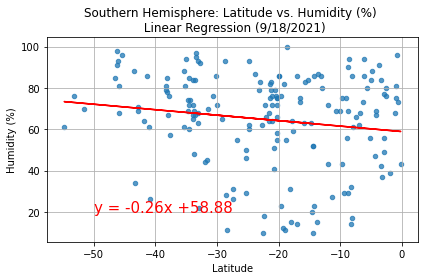

Correlation coeffecient [R-Value] is -0.15
Analysis:
Both hemispheres had similarly weak correlations (r = 0.11 and r = -0.15).
This would imply that a city's latitude does not have much impact upon it's humidity levels.
This makes sense as although temperature would contribute (something predictable by latitude),
there must be other factors such as nearby bodies of water and wind patterns?


In [33]:
# Refer to: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
# For notes on the code. This is just a modified copy.

(slope, intercept, rvalue, _, _) = linregress(southern_df['Lat'],southern_df['Humidity'])
fit = slope*southern_df['Lat']+intercept


southern_df.plot.scatter(x = 'Lat', y = 'Humidity', grid = True, alpha = 0.75)
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.title(f'Southern Hemisphere: Latitude vs. Humidity (%) \n Linear Regression {today}')

plt.plot(southern_df['Lat'], fit ,"-", color = "red")
plt.annotate(f'y = {round(slope, 2)}x +{round(intercept, 2)}', [-50, 20], color = 'red', fontsize = 15)

plt.tight_layout()
plt.show()
print(f'Correlation coeffecient [R-Value] is {round(rvalue,2)}')

print('''Analysis:
Both hemispheres had similarly weak correlations (r = 0.11 and r = -0.15).
This would imply that a city\'s latitude does not have much impact upon it\'s humidity levels.
This makes sense as although temperature would contribute (something predictable by latitude),
there must be other factors such as nearby bodies of water and wind patterns?''')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

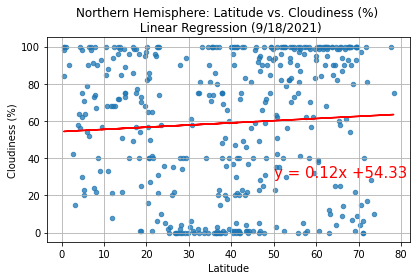

Correlation coeffecient [R-Value] is 0.06


In [37]:
# Refer to: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
# For notes on the code. This is just a modified copy.

(slope, intercept, rvalue, _, _) = linregress(northern_df['Lat'],northern_df['Cloudiness'])
fit = slope*northern_df['Lat']+intercept


northern_df.plot.scatter(x = 'Lat', y = 'Cloudiness', grid = True, alpha = 0.75) 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)") 
plt.title(f'Northern Hemisphere: Latitude vs. Cloudiness (%) \n Linear Regression {today}')

plt.plot(northern_df['Lat'], fit ,"-", color = "red")
plt.annotate(f'y = {round(slope, 2)}x +{round(intercept, 2)}', [50, 30], color = 'red', fontsize = 15)

plt.tight_layout()
plt.show()
print(f'Correlation coeffecient [R-Value] is {round(rvalue,2)}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

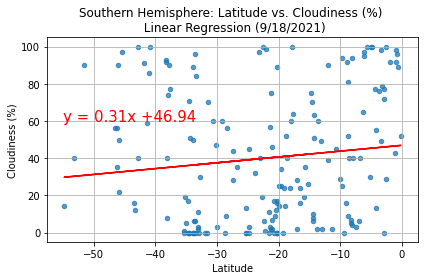

Correlation coeffecient [R-Value] is 0.12
Analysis:
Looking at Cloudiness this is the first analysis where both hemispheres saw a positive
correlation with latitude (r = 0.08 and r = 0.22). It was stronger in the south as you moved
towards the equator and then much weaker afterwards, telling us that perhaps due to
tilt or wind patterns as you go North it will slightly get cloudier.


In [40]:
# Refer to: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
# For notes on the code. This is just a modified copy.

(slope, intercept, rvalue, _, _) = linregress(southern_df['Lat'],southern_df['Cloudiness'])
fit = slope*southern_df['Lat']+intercept


southern_df.plot.scatter(x = 'Lat', y = 'Cloudiness', grid = True, alpha = 0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)") 
plt.title(f'Southern Hemisphere: Latitude vs. Cloudiness (%) \n Linear Regression {today}')

plt.plot(southern_df['Lat'], fit ,"-", color = "red")
plt.annotate(f'y = {round(slope, 2)}x +{round(intercept, 2)}', [-55, 60], color = 'red', fontsize = 15)

plt.tight_layout()
plt.show()
print(f'Correlation coeffecient [R-Value] is {round(rvalue,2)}')

print('''Analysis:
Looking at Cloudiness this is the first analysis where both hemispheres saw a positive
correlation with latitude (r = 0.08 and r = 0.22). It was stronger in the south as you moved
towards the equator and then much weaker afterwards, telling us that perhaps due to
tilt or wind patterns as you go North it will slightly get cloudier.''')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

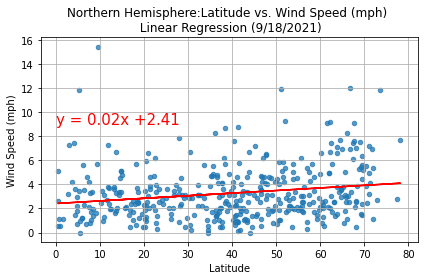

Correlation coeffecient [R-Value] is 0.19


In [46]:
# Refer to: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
# For notes on the code. This is just a modified copy.

(slope, intercept, rvalue, _, _) = linregress(northern_df['Lat'],northern_df['Wind Speed'])
fit = slope*northern_df['Lat']+intercept


northern_df.plot.scatter(x = 'Lat', y = 'Wind Speed', grid = True, alpha = 0.75) 
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (mph)")
plt.title(f'Northern Hemisphere:Latitude vs. Wind Speed (mph) \n Linear Regression {today}')

plt.plot(northern_df['Lat'], fit ,"-", color = "red")
plt.annotate(f'y = {round(slope, 2)}x +{round(intercept, 2)}', [0, 9], color = 'red', fontsize = 15)

plt.tight_layout()
plt.show()
print(f'Correlation coeffecient [R-Value] is {round(rvalue,2)}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

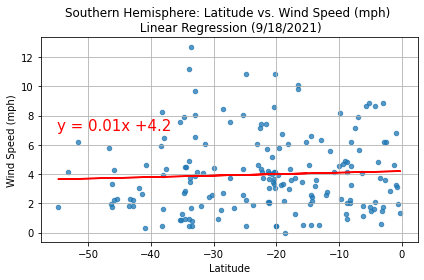

Correlation coeffecient [R-Value] is 0.05
Analysis:
Similar to cloudiness, wind speed saw positive correlations across both hemipsheres 
(r = 0.19 and r = 0.05). Perhaps they have some relation. Either variable were weakly
related to latitude however with their r-values so close to 0.


In [51]:
# Refer to: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
# For notes on the code. This is just a modified copy.

(slope, intercept, rvalue, _, _) = linregress(southern_df['Lat'],southern_df['Wind Speed'])
fit = slope*southern_df['Lat']+intercept


southern_df.plot.scatter(x = 'Lat', y = 'Wind Speed', grid = True, alpha = 0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f'Southern Hemisphere: Latitude vs. Wind Speed (mph) \n Linear Regression {today}')

plt.plot(southern_df['Lat'], fit ,"-", color = "red")
plt.annotate(f'y = {round(slope, 2)}x +{round(intercept, 2)}', [-55, 7], color = 'red', fontsize = 15)

plt.tight_layout()
plt.show()
print(f'Correlation coeffecient [R-Value] is {round(rvalue,2)}')

print('''Analysis:
Similar to cloudiness, wind speed saw positive correlations across both hemipsheres 
(r = 0.19 and r = 0.05). Perhaps they have some relation. Either variable were weakly
related to latitude however with their r-values so close to 0.''')